# Imports

In [7]:
from sin_nn import build_sin_model
from metrics import amape_score

import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

# Sin-wave Generation

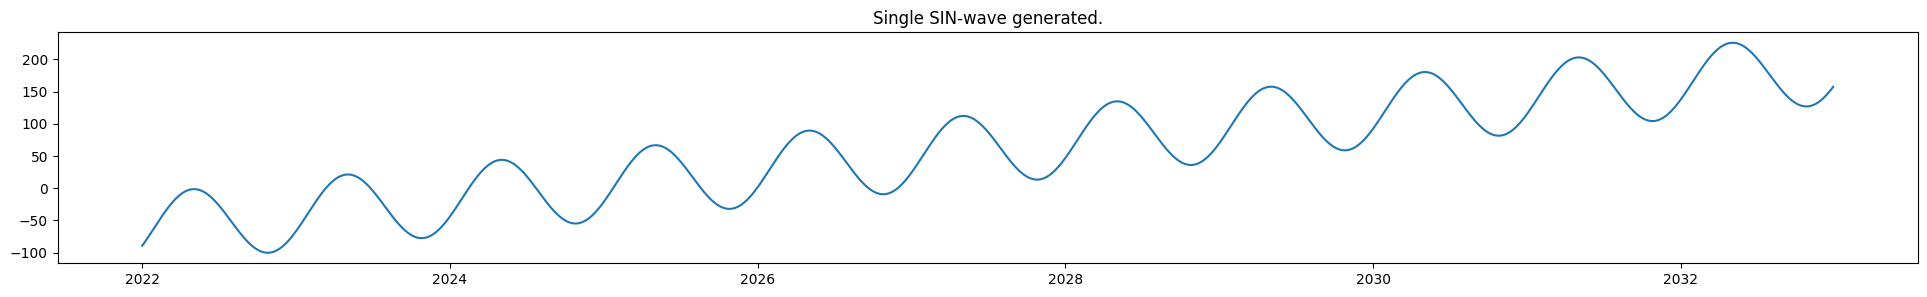

In [15]:
n_years = np.random.randint(1, 15)
frequency = 2 * np.pi / 365.25

beta = 1
elevation_power = 0
amplitude_change_power = 0
variation = True

amplitude = np.random.randint(-100, 100)
phase_shift = np.random.randint(-180, 180)
period_starts = pd.Timestamp('2022-01-01')
a = np.random.randint(-500, 500) / (n_years * 365.25)
b = np.random.randint(-100, 100)

duration_days = 365 * n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

X = np.linspace(1, duration_days, duration_days)

if not variation:
    y = amplitude * np.sin(frequency * X + phase_shift)
else:
    y = amplitude * (X**amplitude_change_power) * np.sin(X**beta * frequency + phase_shift)

y += a * X + b
y += -1 + X**elevation_power
x_date = pd.date_range(period_starts, period_ends, freq='D')[:-1]

plt.figure(figsize=(24,3))
plt.plot(x_date, y)
plt.title('Single SIN-wave generated.')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, shuffle=False)

# The SIN-based model

In [16]:
sin_model = build_sin_model(x=X_train, y=y_train)

Model: "Sin-wave_model_with_linear_component"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 phase_shift (Dense)         (None, 1)                    1         ['input[0][0]']               
                                                                                                  
 frequency (Dense)           (None, 1)                    1         ['input[0][0]']               
                                                                                                  
 phase_shift_amplifier (Den  (None, 1)                    1         ['phase_shift[0][0]']         
 se)                                                           

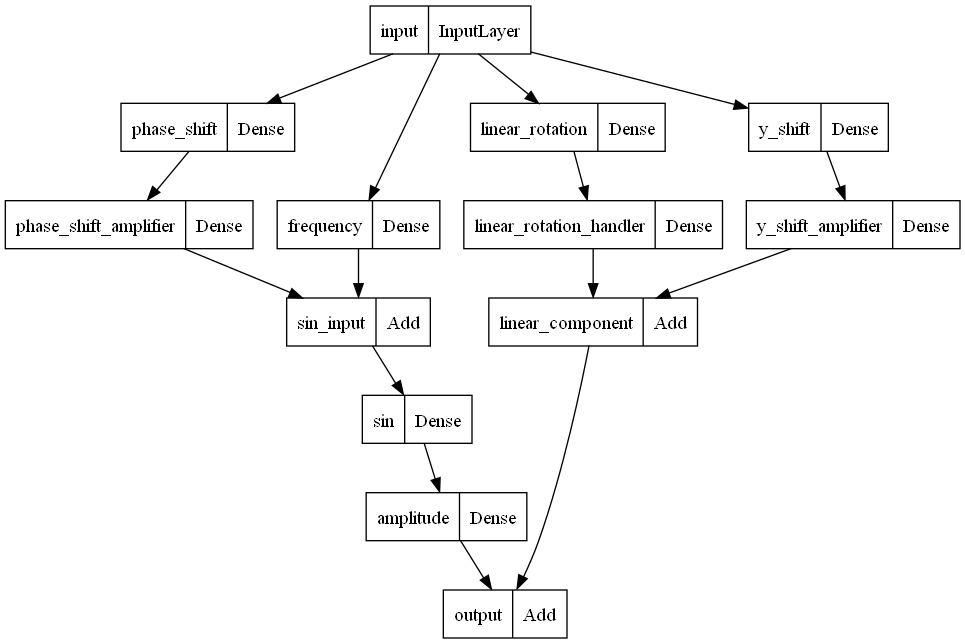

In [17]:
tf.keras.utils.plot_model(sin_model)

In [18]:
sin_model.weights

[<tf.Variable 'phase_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'frequency/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.01720242]], dtype=float32)>,
 <tf.Variable 'phase_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'linear_rotation/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.e-06]], dtype=float32)>,
 <tf.Variable 'y_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[30.113739]], dtype=float32)>,
 <tf.Variable 'linear_rotation_handler/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.e-06]], dtype=float32)>,
 <tf.Variable 'y_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'sin/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'amplitude/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[135.47069]], dtype=float32)>]

# Forecast:  Test on a synthetic example

32/32 [==============================] - 0s 1ms/step


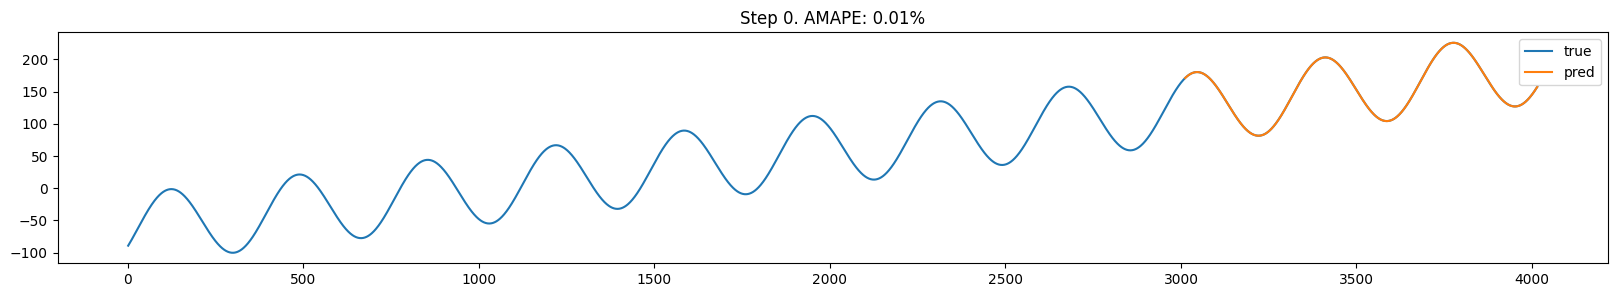

In [19]:
for step in range(1):
  sin_model.fit(
      X_train,
      y_train,
      epochs=50,
      verbose=False
      )
  y_pred = sin_model.predict(X_test)
  amape =  amape_score(y_test, y_pred, reference=y_train)
  fig = plt.figure(figsize=(20,3))
  plt.plot(X.flatten(), y, label='true')
  plt.plot(X_test.flatten(), y_pred, label='pred')
  plt.title(f'Step {step}. AMAPE: {amape:.2f}%')
  plt.legend()
  plt.show()

In [20]:
sin_model.weights

[<tf.Variable 'phase_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'frequency/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.01720242]], dtype=float32)>,
 <tf.Variable 'phase_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.495669]], dtype=float32)>,
 <tf.Variable 'linear_rotation/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.24942861]], dtype=float32)>,
 <tf.Variable 'y_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[30.113739]], dtype=float32)>,
 <tf.Variable 'linear_rotation_handler/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.24942844]], dtype=float32)>,
 <tf.Variable 'y_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-2.1253655]], dtype=float32)>,
 <tf.Variable 'sin/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'amplitude/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[55.00034]], dtype=float32)>]